In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#import data from csv files
data_main = pd.read_csv('dataset_modified.csv',index_col=0)
data_time = pd.read_csv('dataset_duration.csv',index_col=0)

In [4]:
data_main.head(3)

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,07:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,07:15:23,M35,OFF,NaN,NaN


In [5]:
event_list      = data_time['location'].unique()
event_value     = dict(zip(event_list,range(len(event_list))))
color_set       = ['#03045e','#023e8a','#0077b6','#0096c7','#00b4d8','#48cae4','#90e0ef','#ade8f4','#caf0f8','#03045e','#023e8a','#0077b6','#0096c7']

In [6]:
date_time_temp = []
for i in range(len(event_list)):
    date_time_temp.append(data_time.loc[data_time['location'].str.contains(event_list[i])])

In [7]:
data_time = pd.concat(date_time_temp).reset_index(drop=True)

In [8]:
data_time.head(6)

,date,time,type,state,location,BE,duration
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin,0 days 00:05:47
1,02/02/2009,07:21:04,M41,OFF,R1_Bed_to_Toilet,end,NaN
2,03/02/2009,07:29:34,M35,ON,R1_Bed_to_Toilet,begin,0 days 00:06:14
3,03/02/2009,07:35:48,M32,OFF,R1_Bed_to_Toilet,end,NaN
4,04/02/2009,07:26:00,M33,OFF,R1_Bed_to_Toilet,begin,0 days 00:14:03
5,04/02/2009,07:40:03,M36,ON,R1_Bed_to_Toilet,end,NaN


In [9]:
event_value

{'R1_Bed_to_Toilet': 0,
 'R1_Personal_Hygiene': 1,
 'R2_Bed_to_Toilet': 2,
 'Meal_Preparation': 3,
 'R2_Personal_Hygiene': 4,
 'Watch_TV': 5,
 'R1_Work': 6,
 'R2_Work': 7,
 'R1_Sleep': 8,
 'R2_Sleep': 9,
 'Wash_Bathtub': 10,
 'Clean': 11,
 'Study': 12}

In [10]:
timeline = data_main['date'] + '/' + data_main['time']
timeline = pd.to_datetime(timeline,format='%d/%m/%Y/%H:%M:%S')

In [11]:
eventline = data_time['date'] + '/' + data_time['time']
eventline = pd.to_datetime(eventline,format='%d/%m/%Y/%H:%M:%S')

In [12]:
dura = 2

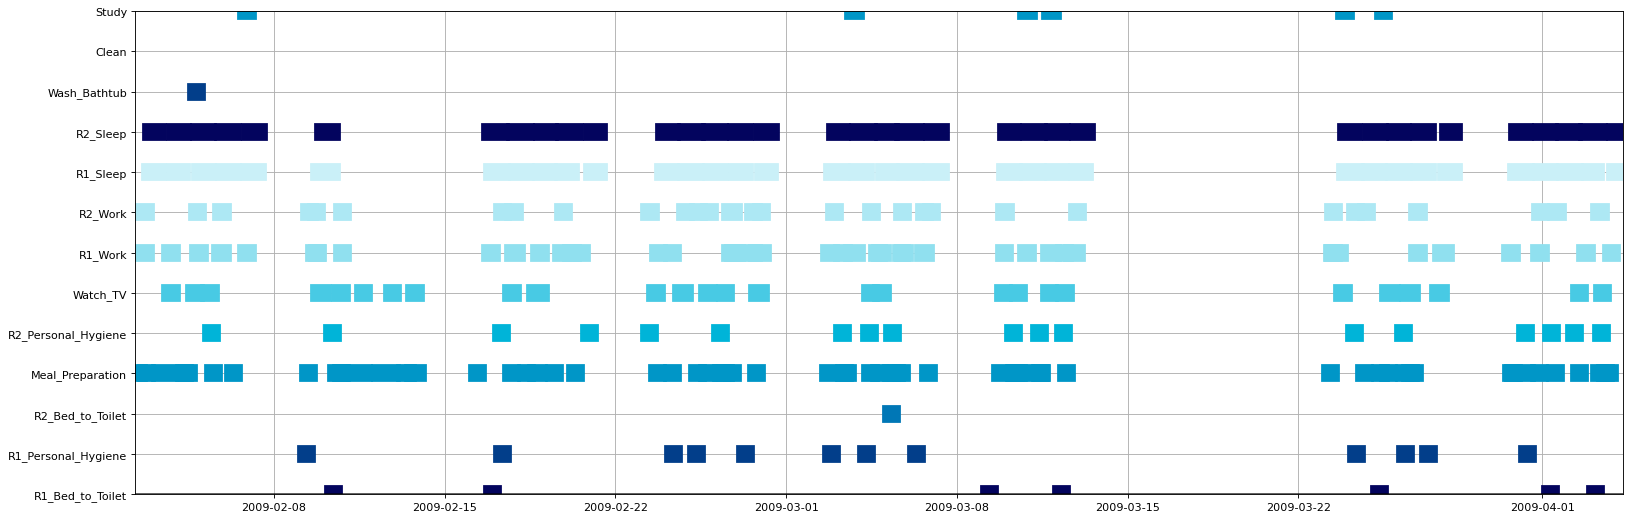

In [13]:
fig,ax = plt.subplots(figsize = (24,8), dpi = 80)
#activities
#ax.axhline(0.5, color='grey', linewidth=5,xmax = 0.5)
#ax.plot(eventline[0:0+dura],[1]*dura, linewidth = 10,c = 'red')
for i in range(len(data_time)):
    if data_time['BE'][i] == 'begin':
        ax.plot(eventline[i:i+dura],[event_value[data_time['location'][i]]]*dura, linewidth = 16,c = color_set[event_value[data_time['location'][i]]]) 

#time show
ax.plot(timeline,[0]*len(timeline),c = 'black')
ax.set_ylim(0,12)
ax.set_yticks(range(13))
ax.set_yticklabels(event_list)
ax.set_xlim(timeline[0],timeline[len(timeline)-1])
#ax.set_xlim(dt.datetime(2009, 2, 8),dt.datetime(2009, 2, 15))
ax.grid(True)

In [14]:
event_list

array(['R1_Bed_to_Toilet', 'R1_Personal_Hygiene', 'R2_Bed_to_Toilet',
       'Meal_Preparation', 'R2_Personal_Hygiene', 'Watch_TV', 'R1_Work',
       'R2_Work', 'R1_Sleep', 'R2_Sleep', 'Wash_Bathtub', 'Clean',
       'Study'], dtype=object)

In [15]:
temp = data_main.dropna(subset=['BE'])
temp_B = temp.loc[temp['BE'].str.contains('begin')]
temp_E = temp.loc[temp['BE'].str.contains('end')]

In [16]:
temp_B_index = temp_B.loc[temp_B['location'].str.contains(event_list[0])].index
temp_E_index = temp_E.loc[temp_E['location'].str.contains(event_list[0])].index

In [17]:
temp_RE = []
for i in event_list:
    event_temp = temp.loc[temp['location'].str.contains(i)]
    temp_RE.append(event_temp)
    pass
temp_RE = pd.concat(temp_RE)

In [18]:
temp_RE

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
71,02/02/2009,07:21:04,M41,OFF,R1_Bed_to_Toilet,end
3787,03/02/2009,07:29:34,M35,ON,R1_Bed_to_Toilet,begin
3854,03/02/2009,07:35:48,M32,OFF,R1_Bed_to_Toilet,end
6661,04/02/2009,07:26:00,M33,OFF,R1_Bed_to_Toilet,begin
...,...,...,...,...,...,...
106147,23/03/2009,22:23:05,M13,OFF,Study,end
107739,24/03/2009,08:24:15,M08,OFF,Study,begin
107851,24/03/2009,08:36:44,M13,OFF,Study,end
111177,25/03/2009,11:26:18,M13,ON,Study,begin


In [19]:
event_value

{'R1_Bed_to_Toilet': 0,
 'R1_Personal_Hygiene': 1,
 'R2_Bed_to_Toilet': 2,
 'Meal_Preparation': 3,
 'R2_Personal_Hygiene': 4,
 'Watch_TV': 5,
 'R1_Work': 6,
 'R2_Work': 7,
 'R1_Sleep': 8,
 'R2_Sleep': 9,
 'Wash_Bathtub': 10,
 'Clean': 11,
 'Study': 12}

In [20]:
def select_event(code):
    return temp_RE.loc[temp_RE['location'].str.contains(event_list[code])]

In [21]:
event_list[0]
e0 = select_event(0)
e0

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
71,02/02/2009,07:21:04,M41,OFF,R1_Bed_to_Toilet,end
3787,03/02/2009,07:29:34,M35,ON,R1_Bed_to_Toilet,begin
3854,03/02/2009,07:35:48,M32,OFF,R1_Bed_to_Toilet,end
6661,04/02/2009,07:26:00,M33,OFF,R1_Bed_to_Toilet,begin
...,...,...,...,...,...,...
134824,03/04/2009,04:27:41,M32,ON,R1_Bed_to_Toilet,end
134846,03/04/2009,05:02:13,M29,ON,R1_Bed_to_Toilet,begin
134901,03/04/2009,05:06:16,M30,ON,R1_Bed_to_Toilet,end
134920,03/04/2009,05:51:07,M30,ON,R1_Bed_to_Toilet,begin


In [22]:
def select_event_all(code):
    event_all = []
    temp_index = temp_RE.loc[temp_RE['location'].str.contains(event_list[code])].index
    for i in range(0,len(temp_index),2):
        event_all.append(data_main.iloc[temp_index[i]:temp_index[i+1]+1])
        pass
    return pd.concat(event_all)

In [23]:
ea0 = select_event_all(0)
ea0

,date,time,type,state,location,BE
0,02/02/2009,07:15:17,M35,ON,R1_Bed_to_Toilet,begin
1,02/02/2009,07:15:21,AD1-A,2.82231,NaN,NaN
2,02/02/2009,07:15:23,M35,OFF,NaN,NaN
3,02/02/2009,07:15:23,M35,ON,NaN,NaN
4,02/02/2009,07:15:28,AD1-A,2.79926,NaN,NaN
...,...,...,...,...,...,...
134961,03/04/2009,05:53:31,M29,ON,NaN,NaN
134962,03/04/2009,05:53:32,M30,ON,NaN,NaN
134963,03/04/2009,05:53:33,M37,OFF,NaN,NaN
134964,03/04/2009,05:53:34,M38,OFF,NaN,NaN


In [32]:
def select_event_extra(code):
    event_extra     = []
    duration        = {}
    date_time       = {}
    data_main_ex    = data_main.copy()

    #data_main_ex['datetime'] = np.NAN
    #data_main_ex['duration'] = np.NAN

    temp_index = temp_RE.loc[temp_RE['location'].str.contains(event_list[code])].index
    temp_all   = temp_RE.loc[temp_RE['location'].str.contains(event_list[code])]
    #print(temp_all)
    for i in range(0,len(temp_index),2):
        event_extra.append(data_main_ex.iloc[temp_index[i]:temp_index[i+1]+1])

        time_b = temp_all['date'].iloc[i  ] + '/' + temp_all['time'].iloc[i  ]
        time_e = temp_all['date'].iloc[i+1] + '/' + temp_all['time'].iloc[i+1]
        temp_b = pd.to_datetime(time_b,format='%d/%m/%Y/%H:%M:%S')
        temp_e = pd.to_datetime(time_e,format='%d/%m/%Y/%H:%M:%S')

        date_time[temp_index[i  ]] = temp_b
        date_time[temp_index[i+1]] = temp_e
        
        duration[temp_index[i  ]]  = temp_e - temp_b

        pass
    event_extra = pd.concat(event_extra)
    df_t = pd.DataFrame(date_time.values(),index=date_time.keys(),columns=['datetime'])
    df_d = pd.DataFrame(duration.values(),index=duration.keys(),columns=['duration'])

    event_extra = pd.concat([event_extra,df_t],axis=1)
    event_extra = pd.concat([event_extra,df_d],axis=1)
    
    #for j in range(len(event_extra)):
    #    time_extra = event_extra['date'].iloc[j] + '/' + event_extra['time'].iloc[j]
    #    time_extra = pd.to_datetime(time_extra,format='%d/%m/%Y/%H:%M:%S')
    #    event_extra['datetime'].iloc[j] = time_extra
    time_extra = event_extra['date'] + '/' + event_extra['time']
    time_extra = pd.to_datetime(time_extra,format='%d/%m/%Y/%H:%M:%S')
    event_extra['datetime'] = time_extra

    return event_extra

In [33]:
event_extra_0 = select_event_extra(8)
event_extra_0

,date,time,type,state,location,BE,datetime,duration
3168,02/02/2009,22:10:55,M36,ON,R1_Sleep,begin,2009-02-02 22:10:55,0 days 07:46:27
3169,02/02/2009,22:11:00,M32,ON,NaN,NaN,2009-02-02 22:11:00,NaT
3170,02/02/2009,22:11:00,M36,OFF,NaN,NaN,2009-02-02 22:11:00,NaT
3171,02/02/2009,22:11:02,M35,OFF,NaN,NaN,2009-02-02 22:11:02,NaT
3172,02/02/2009,22:11:03,M33,ON,NaN,NaN,2009-02-02 22:11:03,NaT
...,...,...,...,...,...,...,...,...
137853,04/04/2009,07:04:00,M48,OFF,NaN,NaN,2009-04-04 07:04:00,NaT
137854,04/04/2009,07:06:27,M47,ON,NaN,NaN,2009-04-04 07:06:27,NaT
137855,04/04/2009,07:06:28,M47,OFF,NaN,NaN,2009-04-04 07:06:28,NaT
137856,04/04/2009,07:08:43,M35,ON,NaN,NaN,2009-04-04 07:08:43,NaT


In [30]:
code = 12
event_extra_temp = select_event_extra(code)
event_extra_temp.to_pickle('event_'+str(code)+'_data.pkl')

              date      time type state location     BE
15664   06/02/2009  20:01:30  M13   OFF    Study  begin
17524   06/02/2009  22:10:36  M13   OFF    Study    end
27997   16/02/2009  17:23:48  M06    ON    Study  begin
28401   16/02/2009  17:56:34  M09   OFF    Study    end
68423   03/03/2009  17:26:44  M09    ON    Study  begin
69173   03/03/2009  20:41:13  M08   OFF    Study    end
81791   06/03/2009  16:25:32  M01    ON    Study  begin
82089   06/03/2009  17:04:50  M09   OFF    Study    end
89773   10/03/2009  19:41:14  M08    ON    Study  begin
90839   10/03/2009  22:41:16  M10   OFF    Study    end
93940   11/03/2009  19:39:57  M14    ON    Study  begin
96080   11/03/2009  22:09:45  M08   OFF    Study    end
105101  23/03/2009  20:35:02  M14    ON    Study  begin
106147  23/03/2009  22:23:05  M13   OFF    Study    end
107739  24/03/2009  08:24:15  M08   OFF    Study  begin
107851  24/03/2009  08:36:44  M13   OFF    Study    end
111177  25/03/2009  11:26:18  M13    ON    Study

In [34]:
for code in range(12):
    event_extra_temp = select_event_extra(code)
    event_extra_temp.to_pickle('event_'+str(code)+'_data.pkl')
